In [19]:
import pandas as pd
import re
#import nltk
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from datetime import datetime

In [6]:
data_order = pd.read_csv('./data/Orders.csv')

In [9]:
data_order.shape

(51290, 24)

In [7]:
data_order.sample(10)

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
25779,42204,IZ-2013-JO555061-41296,1/22/13,1/26/13,Standard Class,JO-555061,Jesus Ocampo,Home Office,NaN,Arbil,...,OFF-AR-3554,Office Supplies,Art,"Boston Sketch Pad, Fluorescent",$99.72,2,0.0,$0.00,7.710,Medium
31572,2600,US-2015-HR1477098-42270,9/23/15,9/27/15,Standard Class,HR-1477098,Hallie Redmond,Home Office,NaN,Panama City,...,OFF-ST-4259,Office Supplies,Storage,"Fellowes File Cart, Single Width",$54.94,1,0.4,-$25.64,4.829,High
16115,2476,MX-2015-YS2188031-42244,8/28/15,9/1/15,Standard Class,YS-2188031,Yana Sorensen,Corporate,NaN,San José de las Lajas,...,OFF-AP-4971,Office Supplies,Appliances,"KitchenAid Toaster, White",$166.92,3,0.0,$70.08,17.738,High
45986,37297,US-2012-SH19975140-41252,12/9/12,12/13/12,Standard Class,SH-199751404,Sally Hughsby,Corporate,83605.0,Caldwell,...,OFF-PA-6604,Office Supplies,Paper,"Xerox Color Copier Paper, 11"" x 17"", Ream",$91.36,4,0.0,$42.03,8.970,Medium
46,13847,IT-2014-EB1384045-41706,3/8/14,3/8/14,Same Day,EB-1384045,Ellis Ballard,Corporate,NaN,Montreuil,...,FUR-CH-5441,Furniture,Chairs,"Office Star Executive Leather Armchair, Adjust...","$2,092.50",5,0.1,$720.75,652.980,Critical
33822,5183,MX-2015-CK1220518-42103,4/9/15,4/13/15,Standard Class,CK-1220518,Chloris Kastensmidt,Consumer,NaN,Birigui,...,TEC-AC-5205,Technology,Accessories,"Memorex Memory Card, Programmable",$69.18,1,0.0,$21.44,3.973,Medium
4960,793,MX-2014-RP1939016-41801,6/11/14,6/13/14,First Class,RP-1939016,Resi Pölking,Consumer,NaN,Potosí,...,TEC-MA-5517,Technology,Machines,"Okidata Receipt Printer, Wireless",$409.70,5,0.0,$106.50,67.217,Medium
6695,51092,GH-2015-DW348049-42195,7/10/15,7/13/15,First Class,DW-348049,Dianna Wilson,Home Office,NaN,Accra,...,TEC-MA-5547,Technology,Machines,"Panasonic Inkjet, Red",$309.24,1,0.0,$86.58,51.110,Medium
14544,9532,MX-2014-MS1783082-41845,7/25/14,8/1/14,Standard Class,MS-1783082,Melanie Seite,Consumer,NaN,Jiutepec,...,OFF-EN-3664,Office Supplies,Envelopes,"Cameo Interoffice Envelope, with clear poly wi...",$169.90,5,0.0,$15.20,20.562,Medium
9068,801,MX-2014-JH1582039-41927,10/15/14,10/21/14,Standard Class,JH-1582039,John Huston,Consumer,NaN,Cuscatancingo,...,OFF-ST-4267,Office Supplies,Storage,"Fellowes Lockers, Industrial",$554.16,4,0.0,$11.04,36.953,Medium


In [16]:
def tonum(str_):
    return float(str_.replace(',','').replace('$','').strip())
data_order['Profit'] = data_order['Profit'].apply(tonum)


In [29]:
data_order['Order.Date'] = pd.to_datetime(data_order['Order.Date'],format ='%m/%d/%y')
data_order['Ship.Date'] = pd.to_datetime(data_order['Ship.Date'],format ='%m/%d/%y')

In [31]:
data_order['Order.Year'] = pd.DatetimeIndex(data_order['Order.Date']).year

In [33]:
data_order['Order.Month'] = pd.DatetimeIndex(data_order['Order.Date']).month

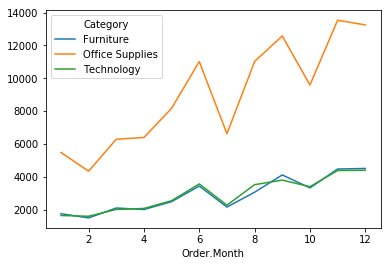

In [52]:
data_order.groupby(['Order.Month','Category']).sum().unstack()['Quantity'].plot()

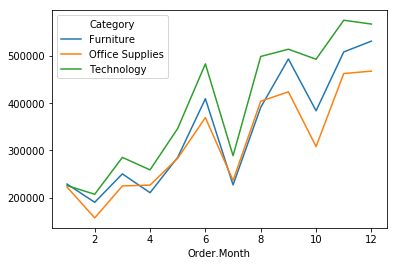

In [54]:
data_order.groupby(['Order.Month','Category'])['Sales'].sum().unstack().plot()

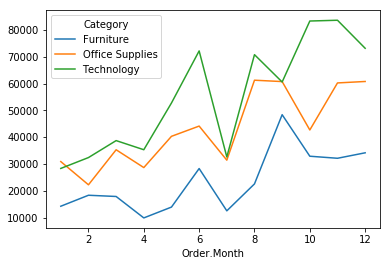

In [55]:
data_order.groupby(['Order.Month','Category'])['Profit'].sum().unstack().plot()

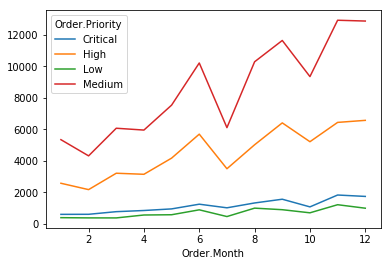

In [58]:
data_order.groupby(['Order.Month','Order.Priority'])['Quantity'].sum().unstack().plot()

In [59]:
returns = pd.read_csv('./data/Returns.csv')

In [99]:
returns.sample(10)

,Returned,Order ID,Region
961,Yes,ES-2012-MZ1751545-41262,Western Europe
636,Yes,CA-2013-LS17245140-41629,Southern US
895,Yes,US-2014-JE1574555-41971,Central America
106,Yes,US-2012-LT17110140-41060,Southern US
720,Yes,CA-2012-RH19495140-41143,Eastern US
872,Yes,EG-2014-SB1018538-41944,North Africa
634,Yes,MX-2014-ML1775593-41795,Central America
216,Yes,IN-2014-KL1655592-41857,Oceania
934,Yes,CA-2014-DP13390140-41784,Eastern US
882,Yes,IN-2015-DK1289559-42281,Southeastern Asia


In [67]:
returns.shape

(1079, 3)

In [65]:
mrgtable = pd.merge(data_order, returns, how='left', left_on = 'Order.ID', right_on = "Order ID")

0               Central US
1                  Oceania
2                  Oceania
3           Western Europe
4           Western Africa
5                  Oceania
6                  Oceania
7                  Oceania
8               Central US
9               Western US
10              Western US
11           Southern Asia
12            Western Asia
13           South America
14            Eastern Asia
15          Western Europe
16              Central US
17         Southern Europe
18                 Oceania
19          Eastern Africa
20          Eastern Europe
21              Western US
22            Eastern Asia
23         Northern Europe
24         Central America
25         Central America
26            Eastern Asia
27          Western Europe
28              Eastern US
29           Southern Asia
               ...        
51260           Central US
51261          Southern US
51262           Western US
51263      Central America
51264              Oceania
51265           Central US
5

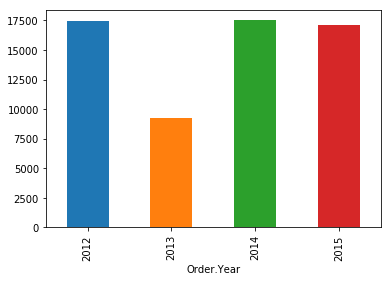

In [80]:
mrgtable[(mrgtable['Returned'] == "Yes")].groupby('Order.Year')['Profit'].sum().plot('bar')

In [83]:
mrgtable[(mrgtable['Returned'] == "Yes")].groupby('Customer.Name')['Customer.Name'].count()

Customer.Name
Aaron Bergman            2
Aaron Hawkins            2
Aaron Smayling           2
Adam Shillingsburg       3
Adrian Barton            3
Adrian Hane              4
Aimee Bixby              1
Alan Barnes              8
Alan Dominguez           2
Alan Haines              3
Alan Schoenberger        2
Alan Shonely             1
Alejandro Ballentine     3
Alejandro Savely        10
Alex Avila               1
Alex Russell             2
Alice McCarthy           5
Allen Goldenen           2
Allen Rosenblatt         2
Alyssa Tate              6
Amy Hunt                 2
Andrew Gjertsen         13
Andrew Roberts           3
Andy Gerbode             4
Andy Yotov               1
Anemone Ratner           2
Angele Hood              5
Ann Blume               10
Ann Chong                2
Anna Andreadi            6
                        ..
Toby Carlisle            4
Toby Gnade               1
Toby Ritter              3
Toby Swindell            1
Tom Boeckenhauer        17
Tom Prescott  

In [92]:
(mrgtable[(mrgtable['Returned'] == "Yes")].groupby('Customer.ID')['Customer.ID'].count()>5) == True

Customer.ID
AA-1031558      False
AA-106451404    False
AA-1064559      False
AA-1064564      False
AA-645137       False
AB-1001527      False
AB-10105101     False
AB-1015093      False
AB-10165139     False
AB-1016545       True
AB-102551404    False
AB-1025582      False
AB-1060058      False
AB-1060064      False
AB-25586        False
AB-60086         True
AC-1061558      False
AC-66038        False
AD-101801406    False
AF-1087026      False
AG-1039045      False
AG-104951402    False
AG-1049545      False
AG-1049564      False
AG-105251402    False
AG-1052518      False
AG-1052582      False
AG-106751408    False
AG-1076527      False
AG-1076539      False
                ...  
TS-215051404    False
TS-2150559      False
TS-216551408    False
TT-210701408    False
TT-212201404    False
TT-212651406    False
TT-2146045      False
TW-2102578      False
TZ-1144523      False
TZ-1144577      False
TZ-2144518      False
TZ-2158093      False
VB-217451       False
VD-216701408    Fals

In [102]:
# which is the region most likely to return
(mrgtable[(mrgtable['Returned'] == "Yes")].groupby('Region_y')['Region_y'].count()/mrgtable.groupby('Region_x')['Region_x'].count()).sort_values()

Eastern Africa       0.024725
Central Africa       0.026439
Eastern Europe       0.027469
Central US           0.030564
Northern Europe      0.034483
Western Europe       0.039606
North Africa         0.039906
Caribbean            0.040828
Western Africa       0.041096
Central Asia         0.041475
Southern Asia        0.041808
Central America      0.044160
Oceania              0.044164
Western Asia         0.044262
South America        0.044511
Southeastern Asia    0.044743
Eastern US           0.047051
Southern US          0.051235
Southern Africa      0.052301
Southern Europe      0.053005
Eastern Asia         0.055181
Western US           0.056197
Canada                    NaN
Eastern Canada            NaN
Western Canada            NaN
dtype: float64

In [104]:
# what is the sub-category mostly likely to be returned. 
(mrgtable[(mrgtable['Returned'] == "Yes")].groupby('Sub.Category')['Sub.Category'].count()/mrgtable.groupby('Sub.Category')['Sub.Category'].count()).sort_values()

Sub.Category
Appliances     0.033869
Fasteners      0.039216
Envelopes      0.041475
Storage        0.041989
Machines       0.042396
Supplies       0.042792
Furnishings    0.042803
Chairs         0.042807
Paper          0.042955
Bookcases      0.043136
Phones         0.043193
Binders        0.043768
Copiers        0.044534
Art            0.044613
Accessories    0.044878
Tables         0.047619
Labels         0.052672
Name: Sub.Category, dtype: float64